In [30]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
wv = np.load('./model/wv.npy')
vocab = []
with open('./data/common_word_list.txt', encoding = 'utf-8') as f:
    for line in f.readlines():
        vocab.append(line.strip())
print(vocab[:10])
print(wv[:10])

['一', '一一', '一丁点儿', '一下', '一专多能', '一世', '一丘之貉', '一丝不挂', '一丝不苟', '一个心眼儿']
[[ 0.12077881  0.01579624 -0.16018876 ...  0.14167114  0.043945
  -0.08207788]
 [-0.1587381   0.2181573  -0.20078327 ...  0.06095327  0.09027559
   0.13185246]
 [ 0.28895995  0.32369     0.00986398 ... -0.1749011  -0.10420036
  -0.08039057]
 ...
 [-0.07374783 -0.35918233  0.23576638 ...  0.06894048 -0.53702134
   0.2312663 ]
 [ 0.1194022  -0.01366967 -0.3884288  ...  0.20233642 -0.07473911
   0.16539133]
 [ 0.23417552 -0.0485241  -0.0285177  ...  0.03321343 -0.00941553
  -0.13841018]]


In [3]:
print(len(vocab), wv.shape)

54639 (54639, 256)


In [4]:
profs = []
with open('./class/profs.txt', encoding = 'utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        profs.append(word)

In [5]:
print(profs, len(profs))

['书记员', '分析师', '猎人', '机长', '糕点师', '司机', '勤杂工', '散文家', '研究员', '电焊工', '舞蹈家', '思想家', '交警', '厨师', '研究院', '美容师', '演奏家', '邮递员', '保洁员', '值机员', '专员', '医师', '泥水匠', '主裁判', '主播', '矿工', '机械师', '督导员', '园艺师', '导购员', '魔术师', '针灸师', '公务员', '城管', '统计员', '哲学家', '狱警', '乘务员', '工人', '史学家', '歌手', '文员', '电工', '航海家', '裁缝', '驯兽师', '协警', '编辑', '发明家', '化妆师', '调酒师', '营养师', '助理', '会计师', '救生员', '裁判长', '收银员', '出纳', '吧女', '石匠', '领航员', '洗碗工', '住院医生', '售货员', '赛车手', '服装师', '策划师', '理发师', '建筑家', '规划师', '伐木工', '作家', '兽医', '民警', '画家', '军人', '教授', '小贩', '治疗师', '记者', '老师', '保姆', '漫画家', '政治家', '警察', '清洁工', '美发师', '执法员', '安装工', '护理员', '架构师', '厨师长', '探险家', '舰长', '摄影师', '法官', '科长', '护士', '讲解员', '书记', '服务员', '经纪人', '修理工', '育婴师', '面包师', '歌唱家', '医生', '班主任', '音乐家', '焊工', '剪辑师', '演员', '畜牧师', '列车员', '艺术家', '瓦匠', '摄像师', '警卫员', '社会工作者', '剧作家', '木匠', '空姐', '门卫', '检察官', '化验员', '警卫', '特警', '顾问', '制片人', '监理', '科学家', '杂工', '法警', '分析员', '地勤', '运动员', '管理员', '操作工', '皮匠', '建筑师', '律师', '侍者', '店员', '消防员', '军事家', '造价师', '副机长', '总经理', '军官', '策略师', '指导

In [6]:
print(wv[vocab.index('教师')][:10])

[ 0.00906083 -0.07015138  0.11922807  0.18287271  0.11654977  0.43798605
  0.34000024  0.3539938  -0.40127665 -0.1980257 ]


In [7]:
label = np.zeros(len(vocab))
cnt = 0
for word in profs:
    if word not in vocab:
        print(word)
        cnt+=1
    else:
        i = vocab.index(word)
        label[i] = 1

In [8]:
r_model = linear_model.LinearRegression()
r_model.fit(wv, label)
display(r_model.intercept_) 
display(r_model.coef_)

0.012223624

array([ 1.03252316e-02, -2.47286540e-03,  7.20741227e-04,  3.54971038e-03,
       -1.25944288e-02,  6.32456737e-03,  5.45501849e-03, -2.25579715e-03,
       -4.67155594e-03, -1.20996172e-03, -7.35023525e-03, -6.29803166e-04,
        5.56526287e-03, -6.91715162e-04, -1.25522690e-03,  1.06913149e-02,
        1.19280331e-02, -4.25625732e-03,  2.95676757e-04,  5.54311322e-04,
       -4.94773127e-03,  1.37595432e-02, -1.17351105e-02, -3.10660154e-03,
        3.90274753e-03, -5.43948263e-03,  1.84928533e-03, -4.83399862e-03,
       -1.51477801e-03,  9.67955776e-03, -1.02853402e-04, -1.15914624e-02,
        4.79650684e-04, -2.71367584e-03,  6.00256957e-03, -6.20018831e-03,
        3.17522418e-03,  2.30072043e-03,  1.76811824e-04,  1.09281773e-02,
       -4.11155820e-03, -5.02328109e-03,  4.23734961e-03, -3.61099071e-03,
       -5.16425446e-03, -3.52904620e-03,  4.44160402e-03,  3.28335748e-03,
        2.86054821e-03,  2.11755512e-04,  3.73963406e-03,  8.51033535e-03,
       -9.93257575e-03, -

In [9]:
r_model.coef_.shape

(256,)

In [10]:
weights = r_model.coef_
bias = r_model.intercept_

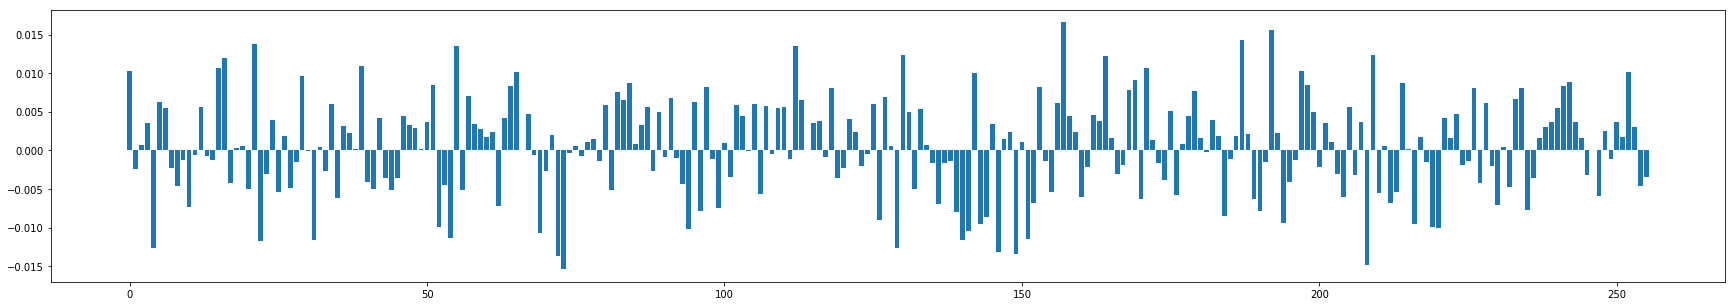

In [11]:
file_name = f'./pics/weight_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 5))
plt.bar(x, r_model.coef_)
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}')
plt.show()

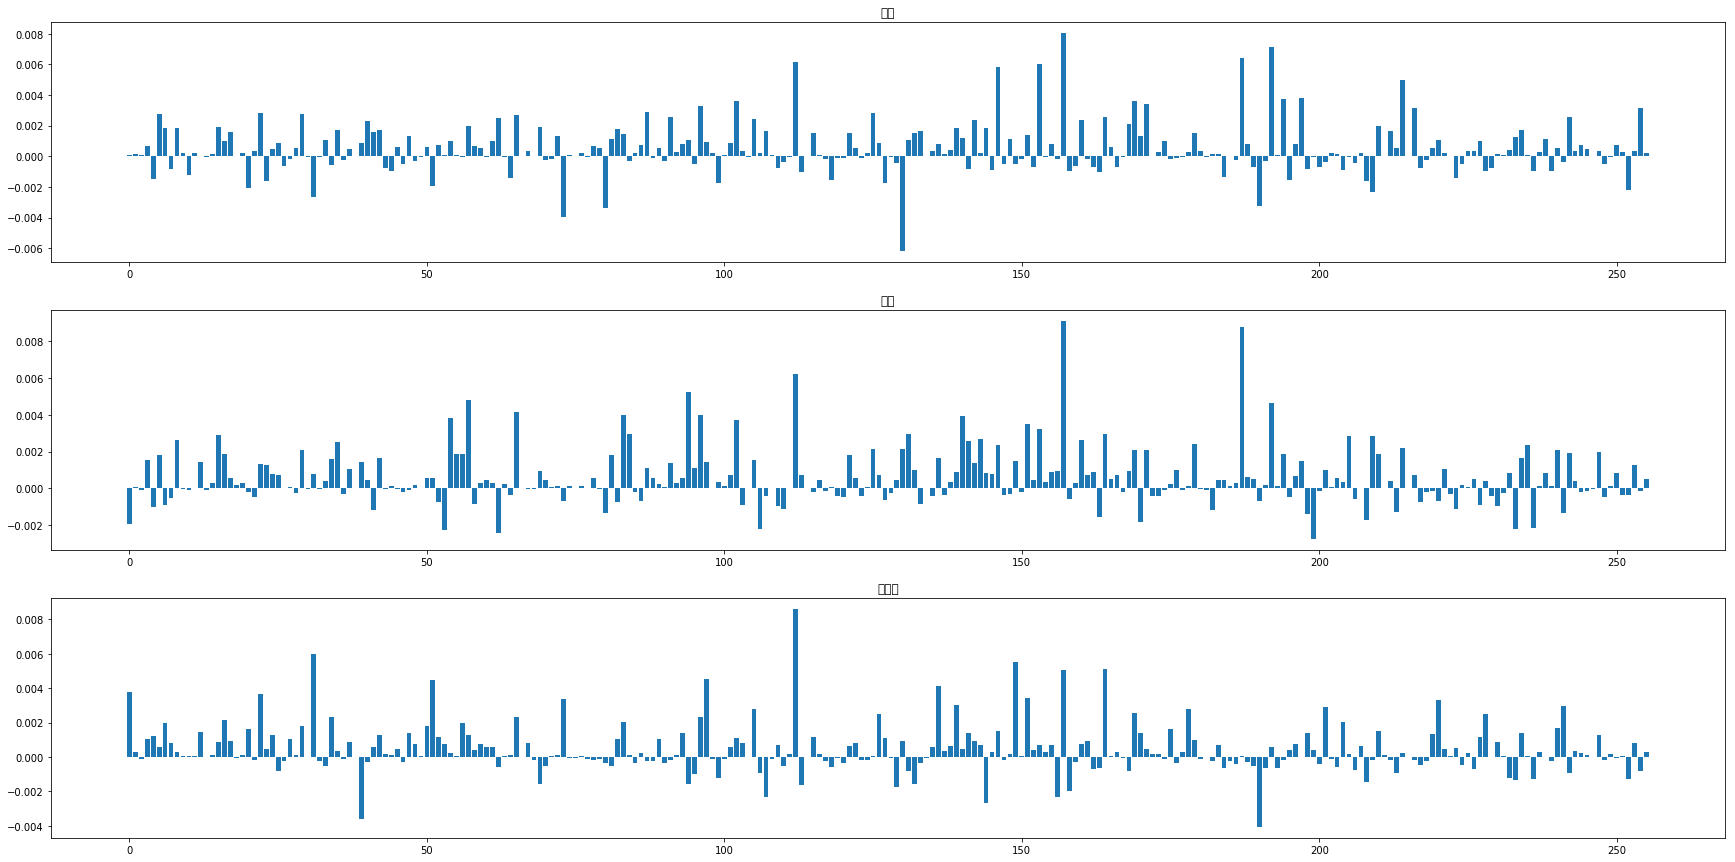

In [12]:
file_name = f'./pics/samples_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 15))
plt.subplot(311)
plt.title('教师')
plt.bar(x, weights*wv[vocab.index('教师')])
plt.subplot(312)
plt.title('律师')
plt.bar(x, weights*wv[vocab.index('律师')])
plt.subplot(313)
plt.title('清洁工')
plt.bar(x, weights*wv[vocab.index('清洁工')])
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}')
plt.show()

In [13]:
# 词向量*权重热力图
profs_wv = []
for word in profs:
    profs_wv.append(wv[vocab.index(word)])

profs_wv = np.array(profs_wv)
profs_wv.shape

(250, 256)

In [17]:
pre_mat = profs_wv*weights
pre_avg = np.mean(pre_mat, axis=0)
pre_avg.shape

(256,)

Picture has been saved as ./pics/heatmap_words_210329_2129.png


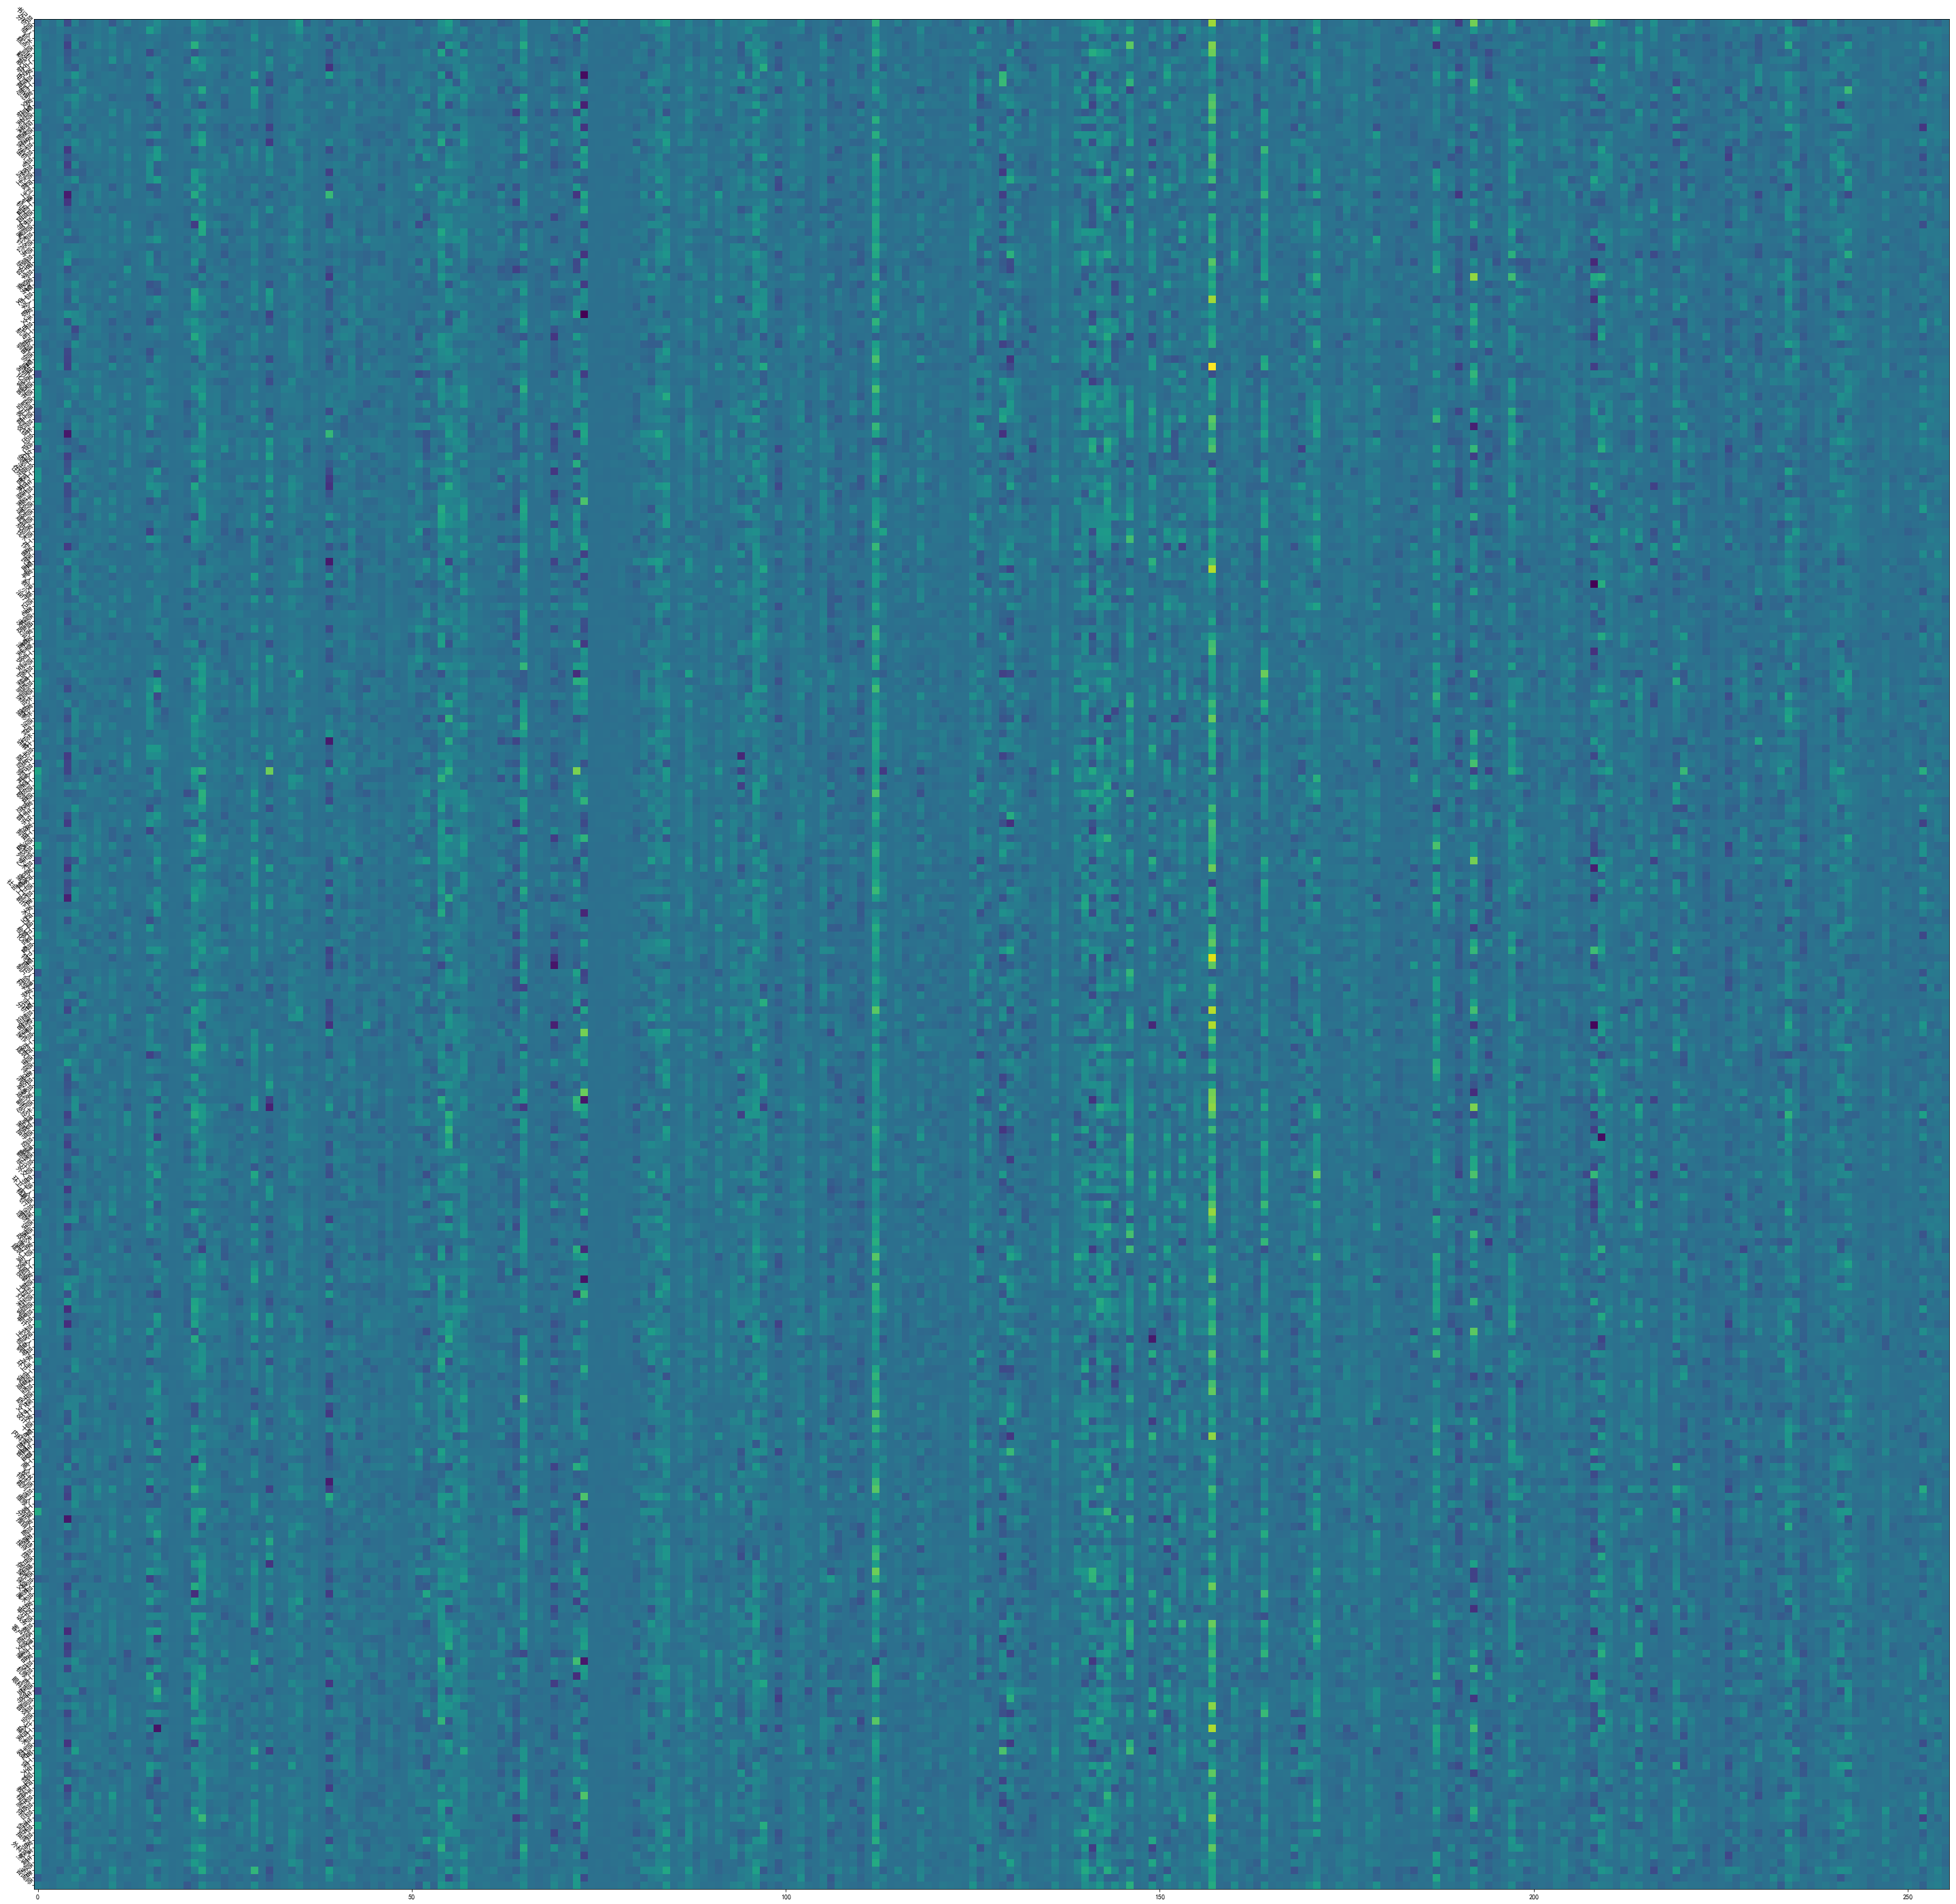

In [42]:
# Heatmap
file_name = f'./pics/heatmap_words_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig, ax = plt.subplots(figsize=(40, 40))
im = ax.imshow(pre_mat)
ax.set_yticks(np.arange(len(profs)))
ax.set_yticklabels(profs)
plt.setp(ax.get_yticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
fig.tight_layout()
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}')
plt.show()

In [44]:
print(np.argsort(-pre_avg))

[157 112 164  65 146 197 171 187  22  54  57  96 143 142  21 192  84 234
 140  29  83 136  55  87 125  97 153 209 242 105 102  56 219 214  34  35
 160 149   0 151 210 240  72  73 228  42  91  16  93 178 139   5 247  15
 235 170 241 204 131 155 179 176  10   8  89 101 175  95 130 212  81 254
 205 118 201  24  47  51 127  23  12  41  82   3 115  37   6 141 113  50
 243 156 252 169 221  94 238  40  17 121  31  45 253 148 203 144  59 196
 198 225  33 138 213   9  86 119  78  62  61  28  60 122 244  88  44 250
   7 255  52 189  27 154  14 161 109 126 184  67  19 186 232  58 216 129
 111 227  92  25  71 233  98 188 166  63 168 172 211 124 249  13   1  49
 220 199 162 185 177 100 135 152  38 165  48 174 215  66 246 116  75  11
  18 104 114  77  74 231  85  30 183  68 134 108  79 173  36 202 145   2
 181  32 167 191 251 222 150 248  26 128  53  20 120  76 137 117 159 133
 132 193  90 237  70 180 239 229  80 207 123 230 200  43 147  46 218 245
 208 103 107 224 223 106 194 182 195 217 158  69  9

In [49]:
# print(pre_mat[:,157].argsort():)
# print(pre_mat[:,112].argsort())
# print(pre_mat[:,164].argsort)

rm_dict = {}
for i in pre_mat[:,157].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 0
    else:
        rm_dict[word] += 1

瓦匠
石匠
编辑
顾问
泥水匠
木匠
屠夫
矿工
经纪人
裁缝
吧女
驯兽师
侍者
邮差
鞋匠
美术师
按摩师
魔术家
花匠
小贩
皮匠
木工
治疗师
保姆
研究院
策略师
杂工
理发师
艺术家
助理
护理员
总监
药师
月嫂
洗碗工
研究员
分析家
魔术师
总经理
猎人
农民
分析员
造型师
秘书
歌手
营养师
翻译员
水手
面包师
理疗师
制片人
教授
助产士
音效师
诗人
书记
内科医生
针灸师
裁判长
主播
记者
电焊工
主管
环卫工
模特
经理
裁判
技师
主持人
设计师
建筑工人
商人
专员
分析师
修理工
伐木工
工人
作家
牙医
育婴师
售货员
邮递员
眼科医生
讲师
采购员
安装工
画家
服装师
摄影师
司机
清洁工
外科医生
执法员
保健员
散文家
管道工
军人
文学家
住院医生
架构师


In [51]:
for i in pre_mat[:,112].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 0
    else:
        rm_dict[word] += 1

for i in pre_mat[:,164].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 0
    else:
        rm_dict[word] += 1

        
for i in pre_mat[:,65].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 0
    else:
        rm_dict[word] += 1        
rm_dict

{'瓦匠': 1,
 '石匠': 2,
 '编辑': 3,
 '顾问': 1,
 '泥水匠': 1,
 '木匠': 0,
 '屠夫': 0,
 '矿工': 1,
 '经纪人': 1,
 '裁缝': 1,
 '吧女': 1,
 '驯兽师': 1,
 '侍者': 0,
 '邮差': 2,
 '鞋匠': 2,
 '美术师': 0,
 '按摩师': 1,
 '魔术家': 1,
 '花匠': 1,
 '小贩': 2,
 '皮匠': 2,
 '木工': 3,
 '治疗师': 1,
 '保姆': 1,
 '研究院': 3,
 '策略师': 2,
 '杂工': 1,
 '理发师': 0,
 '艺术家': 1,
 '助理': 0,
 '护理员': 1,
 '总监': 1,
 '药师': 3,
 '月嫂': 1,
 '洗碗工': 0,
 '研究员': 3,
 '分析家': 2,
 '魔术师': 0,
 '总经理': 1,
 '猎人': 0,
 '农民': 1,
 '分析员': 1,
 '造型师': 1,
 '秘书': 1,
 '歌手': 1,
 '营养师': 1,
 '翻译员': 2,
 '水手': 2,
 '面包师': 1,
 '理疗师': 1,
 '制片人': 1,
 '教授': 2,
 '助产士': 2,
 '音效师': 2,
 '诗人': 2,
 '书记': 0,
 '内科医生': 2,
 '针灸师': 1,
 '裁判长': 0,
 '主播': 1,
 '记者': 2,
 '电焊工': 2,
 '主管': 1,
 '环卫工': 0,
 '模特': 1,
 '经理': 1,
 '裁判': 0,
 '技师': 1,
 '主持人': 1,
 '设计师': 1,
 '建筑工人': 1,
 '商人': 2,
 '专员': 1,
 '分析师': 2,
 '修理工': 0,
 '伐木工': 0,
 '工人': 1,
 '作家': 2,
 '牙医': 2,
 '育婴师': 1,
 '售货员': 1,
 '邮递员': 1,
 '眼科医生': 2,
 '讲师': 1,
 '采购员': 2,
 '安装工': 1,
 '画家': 1,
 '服装师': 0,
 '摄影师': 0,
 '司机': 1,
 '清洁工': 1,
 '外科医生': 0,
 '执法员': 2,
 '保健员': 1,
 '散文家':